<a href="https://colab.research.google.com/github/Kafleavinash/Machinelearning_soil/blob/main/F5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
import shap
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving F5_gnascobig.csv to F5_gnascobig.csv


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv('/content/F5_gnascobig.csv')

# Check structure
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           4111 non-null   object 
 1   lat            4111 non-null   float64
 2   long           4111 non-null   float64
 3   Soil_OM        4111 non-null   float64
 4   Elevation      4111 non-null   float64
 5   Relative_Elev  4111 non-null   float64
 6   Slope          4111 non-null   float64
 7   Aspect         4109 non-null   float64
 8   Profile_curva  4111 non-null   float64
 9   Tang_curva     4111 non-null   float64
 10  Senti_BI1      4111 non-null   float64
 11  Senti_BI2      4111 non-null   float64
 12  Planet_BI1     4110 non-null   float64
 13  Planet_BI2     4110 non-null   float64
 14  TWI            4111 non-null   float64
 15  MRVBF          4111 non-null   float64
 16  Clay_Polaris   4111 non-null   float64
 17  SC_Polaris     4111 non-null   float64
 18  SC_Gnasc

In [ ]:
# Drop the dependent variable from the dataset to get the features (X)
X = df.drop(columns=["Soil_OM"])  # <-- replace with actual column name if different

# Select the dependent variable (y)
y = df["Soil_OM"]


In [ ]:
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())


Independent Variables (X):
       Time     lat    long   Elevation  Relative_Elev     Slope      Aspect  \
0  01/05/23  44.385 -94.123  300.570007       2.760010  2.448449  254.741287   
1  01/05/23  44.385 -94.123  300.589996       2.779999  1.822451  225.009720   
2  01/05/23  44.385 -94.123  300.619995       2.809998  1.417857  225.000000   
3  01/05/23  44.385 -94.123  300.630005       2.820007  1.730160  294.454742   
4  01/05/23  44.385 -94.123  300.579987       2.769989  2.227173  315.007965   

   Profile_curva  Tang_curva    Senti_BI1  ...  SC_Gnasco  SAND_Polaris  \
0       0.012607   -0.009256  2187.321777  ...    17979.0     23.043499   
1       0.015280   -0.005266  2187.321777  ...    17979.0     23.043499   
2      -0.009994   -0.009998  2187.321777  ...    17979.0     23.043499   
3      -0.016306   -0.043690  2187.321777  ...    17979.0     23.043499   
4       0.032004    0.048004  2187.321777  ...    17979.0     23.043499   

   SILT_Polaris  BD_Polaris  PH_Polaris  

RANDOM FOREST

Model: RandomForestRegressor
Setup: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=-0.0034, MAE=0.5384, RMSE=0.7837, R²=0.9558


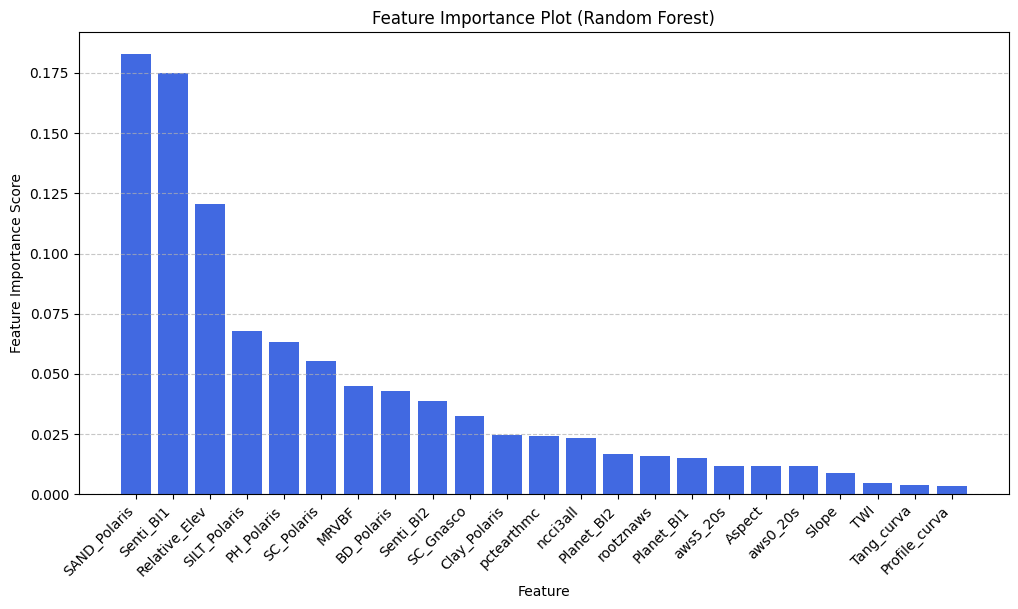

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Import matplotlib.pyplot
from sklearn.model_selection import KFold, GridSearchCV  # Import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assign df to df_m
df_m = df.copy() # Create a copy to avoid modifying the original df

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM','Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Handle missing values in y
# Remove rows with NaN in 'OM' column:

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #

# Define the hyperparameter grid


# Initialize model
rf = RandomForestRegressor(random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the GridSearchCV object to your data to find the best hyperparameters
# This line is added to perform the grid search before accessing best_params_
#.fit(X_scaled, y)

# Get the best hyperparameters and model
#best_params = grid_search.best_params_
#(f"Best Hyperparameters: {best_params}")
#best_rf_model = grid_search.best_estimator_

# ... (Rest of your code using best_rf_model for evaluation) ...

# ... (Perform cross-validation using best_rf_model) ...

# ... (Calculate and print average metrics) ...

# ... (Create DataFrame and plot feature importance using best_rf_model) ...

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]



    # Train model
    rf.fit(X_train, y_train)

    # Predictions
    y_pred = rf.predict(X_test)

    # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: RandomForestRegressor")
print(f"Setup: {rf.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_rf = pd.DataFrame({
    'Actual OM': y_test.values,
    'Predicted OM': y_pred
})


# Extract feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns  # Get the feature names

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Random Forest)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KNN

Model: KNeighborsRegressor
Setup: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Average Metrics Across 10-Fold CV:
MBE=0.0095, MAE=1.7260, RMSE=2.2936, R²=0.6233


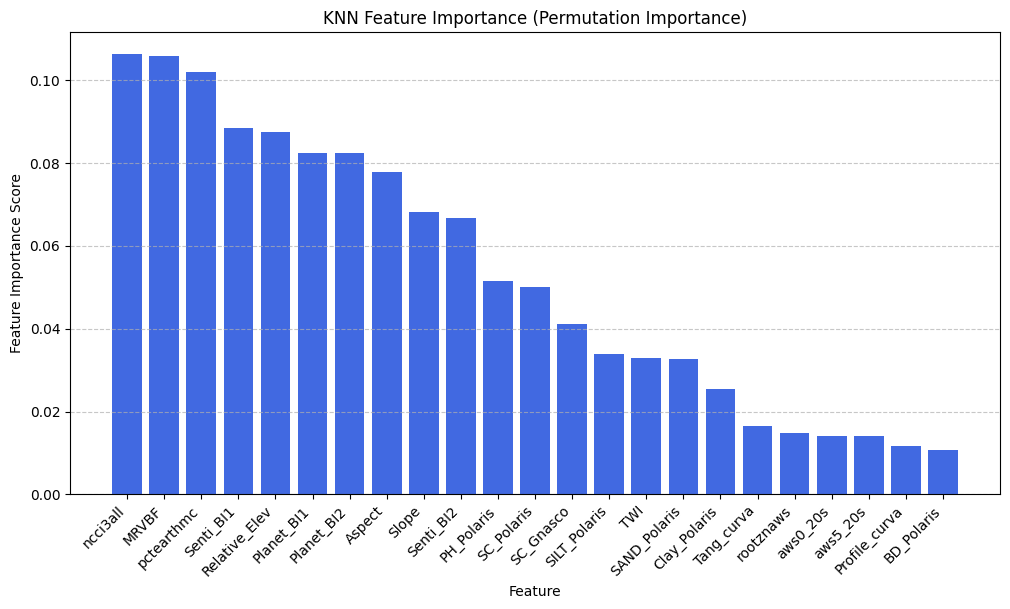

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

 # Now, remove rows with NaN values from both X and y:
#df_cleaned = df_m.dropna(subset=['OM'] + X.columns.tolist()) # Make sure all columns in X are included.
#X = df_cleaned.drop(columns=['OM', 'SAMPLEDATE','Elevation','lati','


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
knn = KNeighborsRegressor(n_neighbors=10)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []


# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: KNeighborsRegressor")
print(f"Setup: {knn.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_knn = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})


# Compute feature importance using permutation importance
perm_importance = permutation_importance(knn, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Extract importance scores
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot feature importance with scores on the y-axis
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')
plt.title('KNN Feature Importance (Permutation Importance)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Initialize Kernelized Support Vector Machines (KSVM) with RBF kernel
ksvm = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale')

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    ksvm.fit(X_train, y_train)

    # Predictions
    y_pred = ksvm.predict(X_test)

      # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel")
print(f"Setup: {ksvm.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
#df_ksvm = pd.DataFrame({
    #'Actual Yield': y_test.values,
    #'Predicted Yield': y_pred
#})

# Feature Importance for Linear Kernel Only
if ksvm.kernel == 'linear':  # Fixed the variable reference
    feature_importances = np.abs(ksvm.coef_).flatten()  # Absolute values of coefficients
    feature_names = X.columns  # Feature names

    # Create DataFrame for visualization
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort descending

    # Plot Feature Importance
    plt.figure(figsize=(12, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
    plt.ylabel("Feature Importance Score (Absolute Coefficients)")
    plt.xlabel("Feature")
    plt.title("Feature Importance Plot (SVR with Linear Kernel)")
    plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Model: Kernelized Support Vector Machines (KSVM) - RBF Kernel
Setup: {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Average Metrics Across 10-Fold CV:
MBE=0.1008, MAE=1.9707, RMSE=2.6104, R²=0.5118


GBR

Model: Gradient Boosting Regressor
Setup: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average Metrics Across 10-Fold CV:
MBE=0.0036, MAE=1.5212, RMSE=1.9139, R²=0.7374


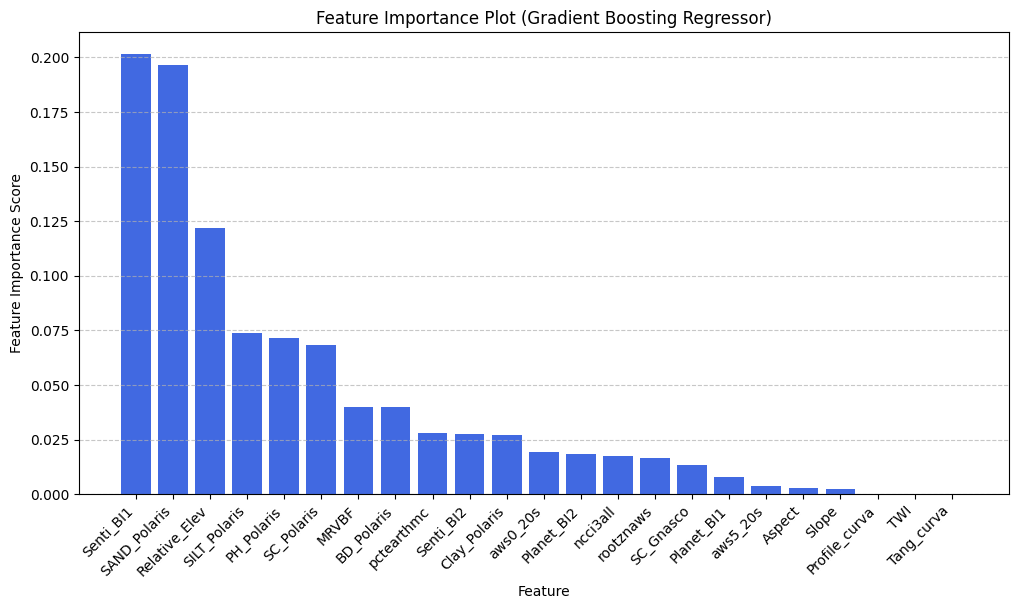

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM','Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Gradient Boosting Regressor (GBR)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    gbr.fit(X_train, y_train)

    # Predictions
    y_pred = gbr.predict(X_test)

    # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Gradient Boosting Regressor")
print(f"Setup: {gbr.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_gb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = gbr.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Gradient Boosting Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


DT

Model: Decision Tree Regressor
Setup: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
Average Metrics Across 10-Fold CV:
MBE=0.0245, MAE=1.0225, RMSE=1.5823, R²=0.8193


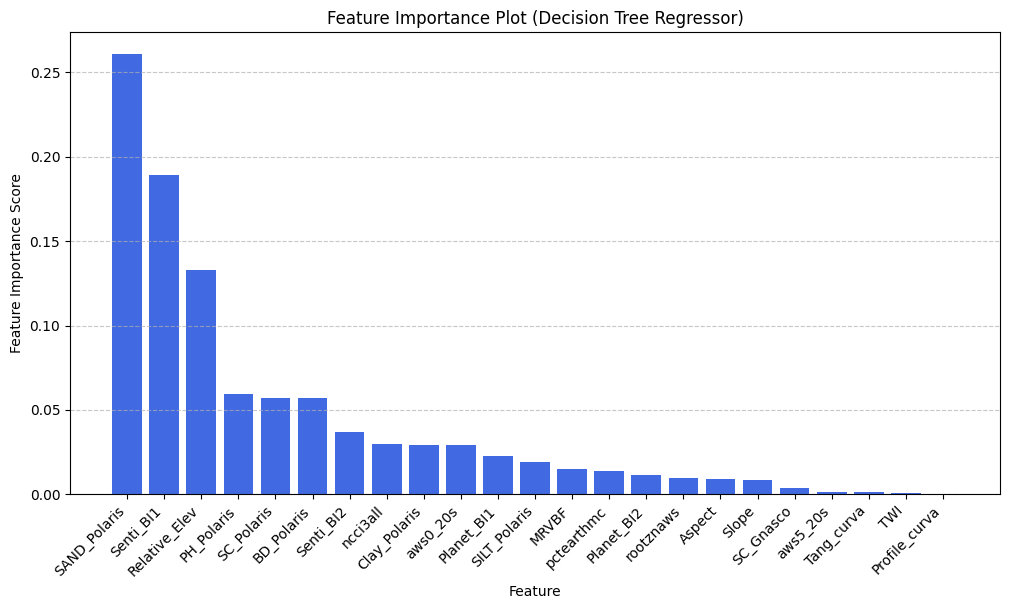

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=10)  # Adjust max_depth for better performance

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Initialize lists to store all predictions and actual values
all_y_test = []
all_y_pred = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    dt.fit(X_train, y_train)

    # Predictions
    y_pred = dt.predict(X_test)

     # Extend all_y_test and all_y_pred after predictions
    all_y_test.extend(y_test)  # Extend with y_test values
    all_y_pred.extend(y_pred)  # Extend with y_pred values

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Decision Tree Regressor")
print(f"Setup: {dt.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dt = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = dt.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (Decision Tree Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

XGBOOST

Model: XGBRegressor
Setup: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Average Metrics Across 10-Fold CV:
MBE=-0.0084, MAE=0.5000, RMSE=0.7917, R²=0.

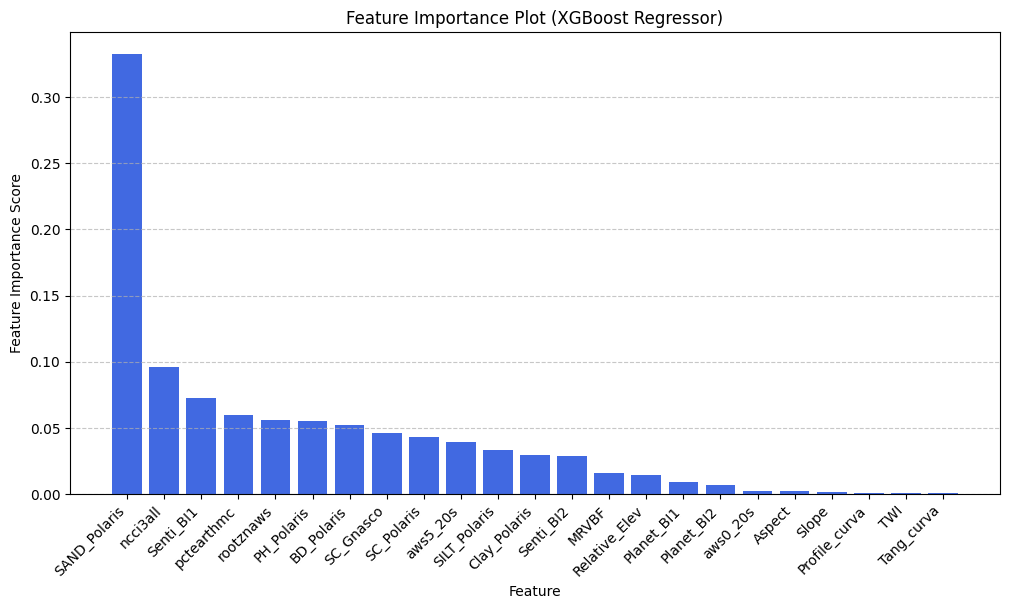

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize XGBoost Regressor
xgb = XGBRegressor(random_state=42, max_depth=10, n_estimators=100, learning_rate=0.1)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: XGBRegressor")
print(f"Setup: {xgb.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_xgb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = xgb.feature_importances_
feature_names = X.columns  # Get the feature names

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # Sort in descending order

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (XGBoost Regressor)")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

LIGHT GBM

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid rmse: 0.946452 + 0.0256769
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[998]	valid_0's rmse: 0.871265
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid rmse: 0.943394 + 0.0213896
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's rmse: 0.886254
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid rmse: 0.925987 + 0.0549147
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 0.81931
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration i

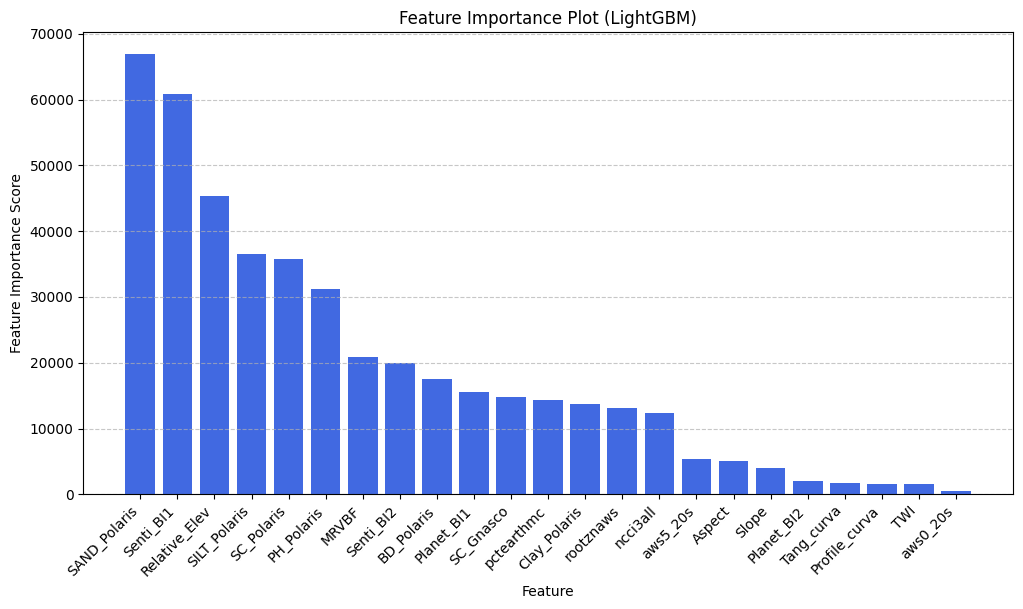

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features (optional for LightGBM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LightGBM parameters
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in a tree
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Fraction of features to use for each tree
    'bagging_fraction': 0.8,  # Fraction of data to use for each tree
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': -1,  # Suppress output
    'random_state': 42,  # Random seed for reproducibility
}

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Convert data into LightGBM Dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Perform LightGBM cross-validation to determine optimal boosting rounds
    cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=1000,
        nfold=5,  # Inner 5-fold CV
        stratified=False,
        metrics='rmse',
        seed=42,
        return_cvbooster=True,
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Extract the best number of boosting rounds
    best_num_boost_rounds = len(cv_results['valid rmse-mean'])

    # Train final model on the fold
    model = lgb.train(
        params,
        train_data,
        num_boost_round=best_num_boost_rounds,
        valid_sets=[test_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50)],
    )

    # Predict on test set
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: LightGBM")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_lgb = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

# Extract feature importances
feature_importances = model.feature_importance(importance_type='gain')
feature_names = X.columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color="royalblue")
plt.ylabel("Feature Importance Score")
plt.xlabel("Feature")
plt.title("Feature Importance Plot (LightGBM)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

STACKING REGRESSOR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM', 'Time','Elevation','lat','long' ])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Base Models for Stacking
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)  # Added GBR

# Define Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbr', gbr)  # Added GBR to the stacking model
    ],
    final_estimator=RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    cv=5
)

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Stacking Model
    stacking_model.fit(X_train, y_train)

    # Predictions
    y_pred = stacking_model.predict(X_test)

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: StackingRegressor")
print(f"Setup: {stacking_model.get_params()}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
#df_sr = pd.DataFrame({
#'Actual Yield': y_test.values,
    #'Predicted Yield': y_pred
#})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Model: StackingRegressor
Setup: {'cv': 5, 'estimators': [('rf', RandomForestRegressor(max_depth=10, random_state=42)), ('knn', KNeighborsRegressor()), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)), ('lgbm', LGBMRegressor(max_depth=5, random_state=42)), ('gbr', GradientBoostingRegressor(max_depth=

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


DEEP NEURAL NETWORK

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM',  'Time','Elevation','lat','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the DNN model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the DNN model
    dnn = build_dnn(X_train.shape[1])
    dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = dnn.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Deep Neural Network (DNN)")
print(f"Setup: {'Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_dnn = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Model: Deep Neural Network (DNN)
Setup: Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)
Average Metrics Across 10-Fold CV:
MBE=-0.0201, MAE=1.5957, RMSE=2.1548, R²=0.6657


Artificial Neural Network

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers

# Define independent (X) and dependent (y) variables
X = df_m.drop(columns=['Soil_OM',  'Time','Elevation','lati','long'])  # Features
y = df_m['Soil_OM']  # Target variable

# Remove rows with NaN values in X and y
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to build the ANN model
def build_ann(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize K-Fold cross-validation (10 folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store evaluation metrics
mbe_list = []
mae_list = []
rmse_list = []
r2_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build and train the ANN model
    ann = build_ann(X_train.shape[1])
    ann.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

    # Predict on test set
    y_pred = ann.predict(X_test).flatten()

    # Compute metrics
    mbe = np.mean(y_pred - y_test)  # Mean Bias Error
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mbe_list.append(mbe)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Compute average metrics across all folds
avg_mbe = np.mean(mbe_list)
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

# Print results
print(f"Model: Artificial Neural Network (ANN)")
print(f"Setup: {'Dense(128, ReLU) -> Dense(64, ReLU) -> Dense(32, ReLU) -> Dense(1)'}")
print(f"Average Metrics Across 10-Fold CV:")
print(f"MBE={avg_mbe:.4f}, MAE={avg_mae:.4f}, RMSE={avg_rmse:.4f}, R²={avg_r2:.4f}")

# Create a DataFrame containing both the predicted and actual yields from the last fold
df_ann = pd.DataFrame({
    'Actual Yield': y_test.values,
    'Predicted Yield': y_pred
})

KeyError: "['lati'] not found in axis"